## Dataiku Data Scientist Technical Assessment and Presentation
Background Information
The United States Census Bureau leads the country’s Federal Statistical System; its primary
responsibility is to collect demographic and economic data about America to help inform
strategic initiatives. Every ten years, the census is conducted to collect and organize information
regarding the US population with the intention of effectively allocating billions of dollars of
funding to various endeavors (e.g., the building and maintenance of hospitals, schools, fire
departments, transportation infrastructure, etc.). Additionally, the collection of census
information helps to examine the demographic characteristics of subpopulations across the
country.
The Data
You have been provided a sample dataset from the US Census archive containing detailed, but
anonymized, information for ~300,000 individuals. This archive contains four files:
1. census_income_learn.csv (data for model training).
2. census_income_test.csv (data for model testing).
3. census_income_metadata.txt (metadata for both datasets).
4. census_income_additional_info.pdf (supplemental information).
You may download this data archive here.
Problem Statement
For this technical assessment, you have been tasked with identifying characteristics that are
associated with a person making more or less than $50,000 per year; the target variable for
your research question is the final column of the datasets.
As the data scientist on this project, you are to attempt to answer this question by constructing a
data analysis/modeling pipeline. Code submissions should be in Python and making the solution
easily readable and replicable by the team will give you additional marks. In the event you would
like to use a different language or tool, please ask. Considerations for your data analysis should
include, but are not limited to, the following:
● Exploratory Data Analysis: Numerical and/or graphical representations of the data that
may help inform insights and/or tactics for answering the research question of interest.
● Data Preparation: Data cleaning, preprocessing, feature engineering, etc., that may aid
in improving data clarity & model generation.
● Data Modeling: The building of a few competing models to predict the target variable.
● Model Assessment: A selection of the best model based on performance comparisons.

● Results: A concise summary of key findings, recommendations, & future improvements.
Presentation Guidelines
Data Scientists at Dataiku are customer facing. Our primary mission is to coach and support
our customers in the use of Data Science Studio and help them become proficient users. This
sometimes includes co-development on customer projects. Given this, your presentation is
intended not only to gauge your general data science proficiency, but also considers your
presentation and customer support skills. In this role effective communication is critical.
For this assessment you will prepare a solution and a presentation for the “customer”. In the
presentation, one or more Dataiku personnel will play the role of the customer.
You will be evaluated based on the following criteria:
● The technical quality of the solution presented
● Your conceptual understanding of common data science topics
● The effectiveness of the presentation
● The presentation skills demonstrated
● Your answers to the customer’s questions

The presentation should be prepared to be roughly 20 minutes with an additional 20 minutes for
questions and discussion of the solution. You may present your slides in any fashion you deem
fit and should expect to explain your methods and results in a manner such that a non-technical
audience would understand. You should assume that the customer audience may range from
expert to novice in terms of data science, so the presentation should be geared towards a
general audience with enough detail to satisfy experts and also general enough to clearly
explain to the novice. You should be prepared to discuss any technical details, subjective
choices, and assumptions you made in the assessment.
Remember, the goal of the exercise is not to necessarily solve the problem completely, but
rather to illustrate a thought process, thoroughly explain an approach, and discuss and critique
the methodology used to answer the research question of interest in a collaborative setting.
Submission Guidelines
You should submit all documents deemed relevant your personal GitHub repository:
1. Code files
2. Slides

Candidates will be assessed first based on their submission (presentation, code) and if they are
successful we will schedule a role play interview with a technical team. As a result it is important
that the notes in the code, the findings from the analysis and the slides are fairly self contained.
However we appreciate that you will want to expand more on points during a full interview so
bullet points are sufficient. More value is placed for the production readiness of the code.
If a candidate passes this stage they will be invited to a follow up interview where they will
present their technical assessment findings to our data science team and more general
technical questions.
Some Advice
Keep in mind that any data science project can continue for an eternity — there will always be
more that could be explored. While you are not timed for this assessment, aim to spend a few
hours constructing your submission with a particular focus on explaining the benefits and
detractions to your approach. A word of advice:

“Do not let perfect be the enemy of the good.” -Voltaire
Please do not hesitate to reach out should you have any questions.
Lastly — good luck!

# 1. Data Loading and Initial Setup

This section covers the initial data loading, column naming, and basic dataset exploration.


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define column names based on the metadata
column_names = [
    'age',
    'class_of_worker',
    'detailed_industry_recode',
    'detailed_occupation_recode',
    'education',
    'wage_per_hour',
    'enroll_in_edu_inst_last_wk',
    'marital_stat',
    'major_industry_code',
    'major_occupation_code',
    'race',
    'hispanic_origin',
    'sex',
    'member_of_labor_union',
    'reason_for_unemployment',
    'full_or_part_time_employment_stat',
    'capital_gains',
    'capital_losses',
    'dividends_from_stocks',
    'tax_filer_stat',
    'region_of_previous_residence',
    'state_of_previous_residence',
    'detailed_household_and_family_stat',
    'detailed_household_summary_in_household',
    'instance_weight',
    'migration_code_change_in_msa',
    'migration_code_change_in_reg',
    'migration_code_move_within_reg',
    'live_in_this_house_1_year_ago',
    'migration_prev_res_in_sunbelt',
    'num_persons_worked_for_employer',
    'family_members_under_18',
    'country_of_birth_father',
    'country_of_birth_mother',
    'country_of_birth_self',
    'citizenship',
    'own_business_or_self_employed',
    'fill_inc_questionnaire_for_veterans_admin',
    'veterans_benefits',
    'weeks_worked_in_year',
    'year',
    'income'
]

print(f"Total number of columns: {len(column_names)}")
print("Column names defined successfully!")


Total number of columns: 42
Column names defined successfully!


In [50]:
# Load the training dataset
print("Loading training dataset...")
train_df = pd.read_csv('census_income_learn.csv', names=column_names, skipinitialspace=True)

print(f"Training dataset shape: {train_df.shape}")
print(f"Training dataset columns: {len(train_df.columns)}")
print("\nFirst few rows of training dataset:")
print(train_df.head())


Loading training dataset...
Training dataset shape: (199523, 42)
Training dataset columns: 42

First few rows of training dataset:
   age                 class_of_worker  detailed_industry_recode  \
0   73                 Not in universe                         0   
1   58  Self-employed-not incorporated                         4   
2   18                 Not in universe                         0   
3    9                 Not in universe                         0   
4   10                 Not in universe                         0   

   detailed_occupation_recode                   education  wage_per_hour  \
0                           0        High school graduate              0   
1                          34  Some college but no degree              0   
2                           0                  10th grade              0   
3                           0                    Children              0   
4                           0                    Children              0   

  e

In [51]:
# Load the test dataset
print("Loading test dataset...")
test_df = pd.read_csv('census_income_test.csv', names=column_names, skipinitialspace=True)

print(f"Test dataset shape: {test_df.shape}")
print(f"Test dataset columns: {len(test_df.columns)}")
print("\nFirst few rows of test dataset:")
print(test_df.head())


Loading test dataset...
Test dataset shape: (99762, 42)
Test dataset columns: 42

First few rows of test dataset:
   age                 class_of_worker  detailed_industry_recode  \
0   38                         Private                         6   
1   44  Self-employed-not incorporated                        37   
2    2                 Not in universe                         0   
3   35                         Private                        29   
4   49                         Private                         4   

   detailed_occupation_recode                            education  \
0                          36             1st 2nd 3rd or 4th grade   
1                          12  Associates degree-occup /vocational   
2                           0                             Children   
3                           3                 High school graduate   
4                          34                 High school graduate   

   wage_per_hour enroll_in_edu_inst_last_wk             

In [52]:
# Basic information about the datasets
print("=== DATASET SUMMARY ===")
print(f"Training dataset: {train_df.shape[0]:,} rows, {train_df.shape[1]} columns")
print(f"Test dataset: {test_df.shape[0]:,} rows, {test_df.shape[1]} columns")

print("\n=== TARGET VARIABLE DISTRIBUTION ===")
print("Training dataset income distribution:")
print(train_df['income'].value_counts())
print(f"Training dataset income distribution (%):")
print(train_df['income'].value_counts(normalize=True) * 100)

print("\nTest dataset income distribution:")
print(test_df['income'].value_counts())
print(f"Test dataset income distribution (%):")
print(test_df['income'].value_counts(normalize=True) * 100)

print("\n=== DATA TYPES ===")
print("Data types in the datasets:")
print(train_df.dtypes.value_counts())


=== DATASET SUMMARY ===
Training dataset: 199,523 rows, 42 columns
Test dataset: 99,762 rows, 42 columns

=== TARGET VARIABLE DISTRIBUTION ===
Training dataset income distribution:
income
- 50000.    187141
50000+.      12382
Name: count, dtype: int64
Training dataset income distribution (%):
income
- 50000.    93.794199
50000+.      6.205801
Name: proportion, dtype: float64

Test dataset income distribution:
income
- 50000.    93576
50000+.      6186
Name: count, dtype: int64
Test dataset income distribution (%):
income
- 50000.    93.799242
50000+.      6.200758
Name: proportion, dtype: float64

=== DATA TYPES ===
Data types in the datasets:
object     29
int64      12
float64     1
Name: count, dtype: int64


In [53]:
# Check for income-related columns in our dataset
print("=== SEARCHING FOR INCOME-RELATED COLUMNS ===")
print("All column names:")
for i, col in enumerate(column_names):
    print(f"{i:2d}: {col}")

print("\n=== INCOME-RELATED COLUMNS ===")
income_related_cols = [col for col in column_names if 'income' in col.lower() or 'earn' in col.lower() or 'wage' in col.lower()]
print("Columns that might be income-related:", income_related_cols)

print("\n=== EXAMINING POTENTIAL TOTAL PERSON INCOME COLUMNS ===")
# Based on metadata, look for continuous variables that might represent total income
continuous_cols = ['age', 'wage_per_hour', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 
                   'instance_weight', 'num_persons_worked_for_employer', 'weeks_worked_in_year']

print("Continuous columns that might include total person income:")
for col in continuous_cols:
    if col in train_df.columns:
        print(f"- {col}: min={train_df[col].min()}, max={train_df[col].max()}, mean={train_df[col].mean():.2f}")


=== SEARCHING FOR INCOME-RELATED COLUMNS ===
All column names:
 0: age
 1: class_of_worker
 2: detailed_industry_recode
 3: detailed_occupation_recode
 4: education
 5: wage_per_hour
 6: enroll_in_edu_inst_last_wk
 7: marital_stat
 8: major_industry_code
 9: major_occupation_code
10: race
11: hispanic_origin
12: sex
13: member_of_labor_union
14: reason_for_unemployment
15: full_or_part_time_employment_stat
16: capital_gains
17: capital_losses
18: dividends_from_stocks
19: tax_filer_stat
20: region_of_previous_residence
21: state_of_previous_residence
22: detailed_household_and_family_stat
23: detailed_household_summary_in_household
24: instance_weight
25: migration_code_change_in_msa
26: migration_code_change_in_reg
27: migration_code_move_within_reg
28: live_in_this_house_1_year_ago
29: migration_prev_res_in_sunbelt
30: num_persons_worked_for_employer
31: family_members_under_18
32: country_of_birth_father
33: country_of_birth_mother
34: country_of_birth_self
35: citizenship
36: own_b

In [54]:
print("=== TARGET VARIABLE DISTRIBUTION (DETAILED) ===")
print("Training dataset income distribution:")
income_counts = train_df['income'].value_counts()
print(income_counts)
print(f"\nTraining dataset income distribution (%):")
income_pct = train_df['income'].value_counts(normalize=True) * 100
print(income_pct)

=== TARGET VARIABLE DISTRIBUTION (DETAILED) ===
Training dataset income distribution:
income
- 50000.    187141
50000+.      12382
Name: count, dtype: int64

Training dataset income distribution (%):
income
- 50000.    93.794199
50000+.      6.205801
Name: proportion, dtype: float64


In [9]:
train_df.info()                # dtypes + non‑null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   age                                        199523 non-null  int64  
 1   class_of_worker                            199523 non-null  object 
 2   detailed_industry_recode                   199523 non-null  int64  
 3   detailed_occupation_recode                 199523 non-null  int64  
 4   education                                  199523 non-null  object 
 5   wage_per_hour                              199523 non-null  int64  
 6   enroll_in_edu_inst_last_wk                 199523 non-null  object 
 7   marital_stat                               199523 non-null  object 
 8   major_industry_code                        199523 non-null  object 
 9   major_occupation_code                      199523 non-null  object 
 10  race    

In [57]:
missing = train_df.isna().sum().sort_values(ascending=False)
print(missing.head(15))  # biggest offenders first


hispanic_origin                       874
age                                     0
instance_weight                         0
migration_code_change_in_msa            0
migration_code_change_in_reg            0
migration_code_move_within_reg          0
live_in_this_house_1_year_ago           0
migration_prev_res_in_sunbelt           0
num_persons_worked_for_employer         0
family_members_under_18                 0
country_of_birth_father                 0
detailed_household_and_family_stat      0
country_of_birth_mother                 0
country_of_birth_self                   0
citizenship                             0
dtype: int64


In [59]:
target_col = train_df.columns[-1]
print(train_df[target_col].value_counts(normalize=True)*100)


income
- 50000.    93.794199
50000+.      6.205801
Name: proportion, dtype: float64


# 2. Data Cleaning and Preprocessing

This section handles missing values, duplicates, string cleaning, and target variable preparation.


In [60]:
dup_cnt = train_df.duplicated().sum()
print("Duplicates:", dup_cnt)      # should be ≈ 46 k per metadata
train_df = train_df.drop_duplicates().reset_index(drop=True)
print("New shape:", train_df.shape)


Duplicates: 3229
New shape: (196294, 42)


In [61]:
# Strip stray spaces / periods from all string columns
# (The label strings have leading spaces and trailing dots that will hurt encoders.)
import numpy as np

obj_cols = train_df.select_dtypes("object").columns
train_df[obj_cols] = train_df[obj_cols].apply(lambda s: s.str.strip().str.replace(r"\.$", "", regex=True))


obj_cols = test_df.select_dtypes("object").columns
test_df[obj_cols] = test_df[obj_cols].apply(lambda s: s.str.strip().str.replace(r"\.$", "", regex=True))


In [62]:
# Standardise the target to simple 0/1 labels
train_df["income"] = train_df["income"].map({"- 50000": 0, "- 50000.": 0,
                                 "50000+": 1, "50000+.": 1})


test_df["income"] = test_df["income"].map({"- 50000": 0, "- 50000.": 0,
                                 "50000+": 1, "50000+.": 1})

In [63]:
train_df["income"].value_counts()

income
0    183912
1     12382
Name: count, dtype: int64

In [64]:
test_df["income"].value_counts()

income
0    93576
1     6186
Name: count, dtype: int64

In [65]:
# Turn obvious “sentinel” strings into real NA
# Many categoricals use '?', 'Not in universe', etc. Treat those as missing so we decide later whether to impute or keep as a category.

sentinel_vals = ["?", "Not in universe", "Not in universe under 1 year old"]
train_df.replace(sentinel_vals, np.nan, inplace=True)
test_df.replace(sentinel_vals, np.nan, inplace=True)


In [66]:
print("Missing after cleaning (top 15):")
print(train_df.isna().sum().sort_values(ascending=False).head(15))


Missing after cleaning (top 15):
fill_inc_questionnaire_for_veterans_admin    194310
reason_for_unemployment                      190226
enroll_in_edu_inst_last_wk                   183762
state_of_previous_residence                  181269
region_of_previous_residence                 180562
migration_prev_res_in_sunbelt                180562
member_of_labor_union                        177232
family_members_under_18                      144161
migration_code_change_in_msa                  99434
migration_code_move_within_reg                99434
live_in_this_house_1_year_ago                 99434
migration_code_change_in_reg                  99434
major_occupation_code                         97467
class_of_worker                               97029
country_of_birth_father                        6703
dtype: int64


### (Column triage & metadata table)

In [67]:
# Quantify missing‑rate for every column

print("=== MISSING VALUE ANALYSIS ===")
pct_missing = train_df.isna().mean().sort_values(ascending=False)*100
print("Top 20 columns with highest missing value rates (%):")
print(pct_missing.head(20))        # see the worst offenders

=== MISSING VALUE ANALYSIS ===
Top 20 columns with highest missing value rates (%):
fill_inc_questionnaire_for_veterans_admin    98.989271
reason_for_unemployment                      96.908719
enroll_in_edu_inst_last_wk                   93.615699
state_of_previous_residence                  92.345665
region_of_previous_residence                 91.985491
migration_prev_res_in_sunbelt                91.985491
member_of_labor_union                        90.289056
family_members_under_18                      73.441369
migration_code_change_in_msa                 50.655649
migration_code_move_within_reg               50.655649
live_in_this_house_1_year_ago                50.655649
migration_code_change_in_reg                 50.655649
major_occupation_code                        49.653581
class_of_worker                              49.430446
country_of_birth_father                       3.414776
country_of_birth_mother                       3.111150
country_of_birth_self               

In [68]:
drop_cols  = pct_missing[pct_missing > 80].index.tolist()
keep_cols  = [c for c in train_df.columns if c not in drop_cols]
print("Drop:", drop_cols)
print("Keep:", len(keep_cols), "columns")

Drop: ['fill_inc_questionnaire_for_veterans_admin', 'reason_for_unemployment', 'enroll_in_edu_inst_last_wk', 'state_of_previous_residence', 'region_of_previous_residence', 'migration_prev_res_in_sunbelt', 'member_of_labor_union']
Keep: 35 columns


In [69]:
new_dups = train_df[keep_cols].duplicated().sum()
print("Duplicates after strip:", new_dups)


Duplicates after strip: 3


In [87]:
work_df = train_df.drop(columns=drop_cols + ["instance_weight"]).drop_duplicates()
y = work_df["income"]
X = work_df.drop(columns=["income"])
print("Shape after prune:", X.shape)

num_cols  = X.select_dtypes(['int64', 'float64']).columns.tolist()
cat_cols  = X.select_dtypes('object').columns.tolist()
print(len(num_cols), "numeric |", len(cat_cols), "categorical")

Shape after prune: (151196, 33)
12 numeric | 21 categorical


In [88]:
y.shape

(151196,)

## Key Take‑Aways

| Symptom              | Detail                                                                                                                                      |
|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| **Missing > 80 %**   | `fill_inc_questionnaire_for_veterans_admin`, `reason_for_unemployment`, `enroll_in_edu_inst_last_wk`, `state_of_previous_residence`, `region_of_previous_residence`, `migration_prev_res_in_sunbelt`, `member_of_labor_union` (all > 90 % except one) |
| **Moderate Missing (50–73 %)** | The four `migration_code` fields and `family_members_under_18`                                                                 |
| **New Duplicates**   | Only 3 remain after the cleanup — nice and tiny.                                                                                           |

---

For a first baseline, let’s keep things lean:

- Drop the **> 80 % missing** columns now (they’re unlikely to help a first pass).
- Drop the **3 residual duplicates**.
- **Ignore** `instance_weight` as advised in the metadata.


# 3. Exploratory Data Analysis

This section provides comprehensive analysis of key variables and their relationships with income levels.


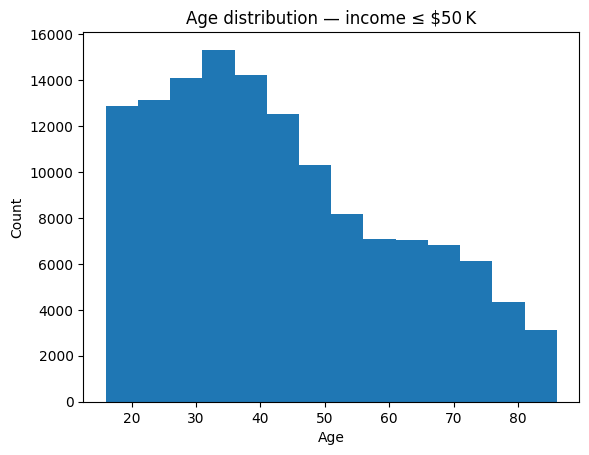

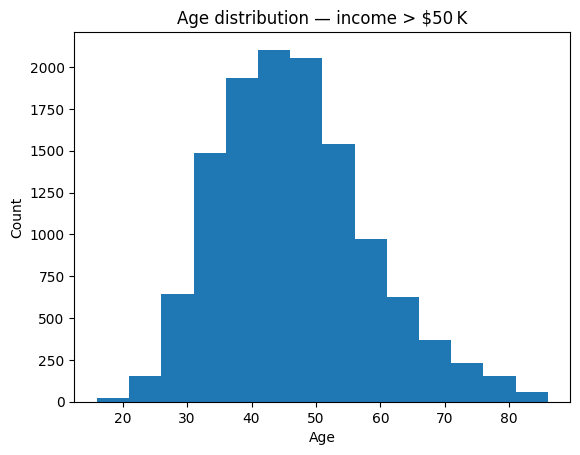

/var/folders/k9/64sj8bbd3c1_5n4pbkhh71_m0000gn/T/ipykernel_23246/4097351816.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


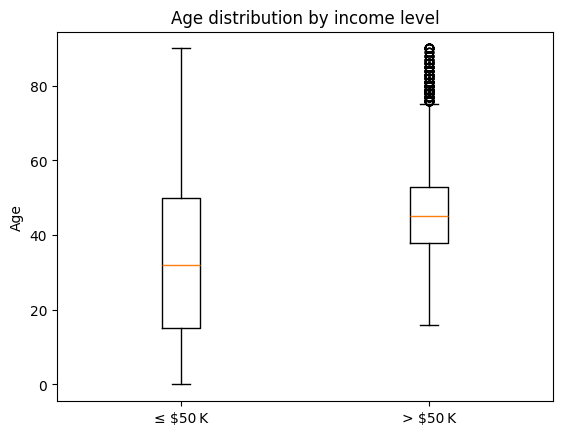

In [71]:
import matplotlib.pyplot as plt
import pandas as pd


df = train_df.copy()

# Histogram — income <= 50 K
plt.figure()
plt.hist(df.loc[df['income'] == 0, 'age'], bins=range(16, 91, 5))
plt.title('Age distribution — income ≤ $50 K')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Histogram — income > 50 K
plt.figure()
plt.hist(df.loc[df['income'] == 1, 'age'], bins=range(16, 91, 5))
plt.title('Age distribution — income > $50 K')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Boxplot comparison
plt.figure()
plt.boxplot(
    [df.loc[df['income'] == 0, 'age'],
     df.loc[df['income'] == 1, 'age']],
    labels=['≤ $50 K', '> $50 K']
)
plt.title('Age distribution by income level')
plt.ylabel('Age')
plt.show()


| Observation                                      | Evidence from the histograms                                                                                                                                                               |
| ------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Older workers dominate the > \$50 K group.**   | The high‑income histogram peaks sharply between **35 – 50 years**, with the modal bar around early‑40s.                                                                                    |
| **Low‑income spans a much wider age range.**     | The ≤ \$50 K group is almost flat from the early‑20s up to late‑40s and still shows sizeable counts well into the 60s–70s.                                                                 |
| **Young adults (< 25) are rarely high‑earners.** | Virtually no bars for the > \$50 K class before age 25, while the ≤ \$50 K class has thousands.                                                                                            |
| **Late‑career earnings taper off.**              | After about **55–60 years**, the high‑income counts fall steeply, whereas the low‑income tail continues—suggesting many older individuals scale back work hours or leave the labour force. |


Age is a strong but non‑linear predictor of income => probability of earning > $50 K rises steeply from roughly 30 to 50, then declines.


income,≤ $50 K,> $50 K,Pct_>50K
education,,,
Children,44347,0,0.0
Less than 1st grade,816,1,0.1
9th grade,6155,38,0.6
1st 2nd 3rd or 4th grade,1786,13,0.7
5th or 6th grade,3255,22,0.7
10th grade,7477,62,0.8
7th and 8th grade,7904,72,0.9
11th grade,6792,70,1.0
12th grade no diploma,2091,34,1.6


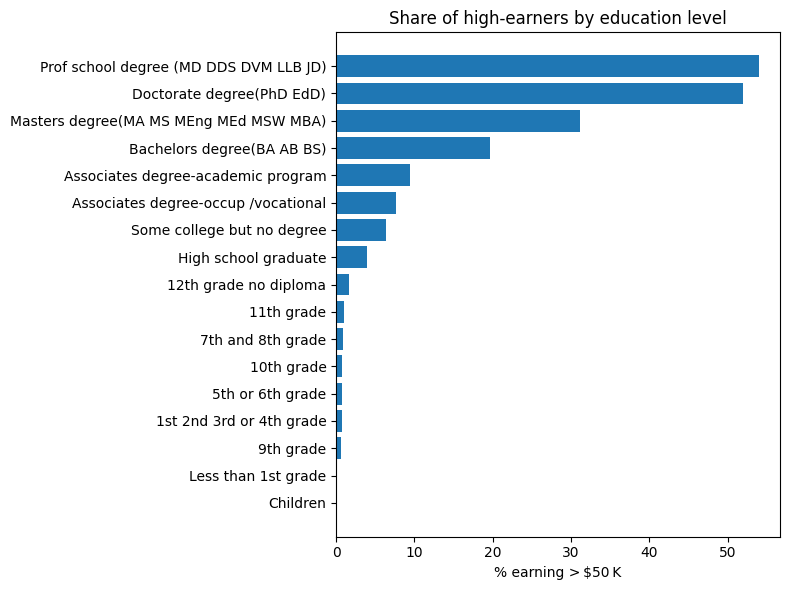

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# 1)  Compute counts and % of > 50 K within each education level
# ---------------------------------------------------------------
edu_stats = (
    df.groupby(["education", "income"])
      .size()
      .unstack(fill_value=0)                # columns: 0 (≤ 50 K), 1 (> 50 K)
      .rename(columns={0: "≤ $50 K", 1: "> $50 K"})
)

edu_stats["Pct_>50K"] = (
    edu_stats["> $50 K"] / edu_stats.sum(axis=1) * 100
).round(1)

# Sort for nicer plotting (ascending % high‑earners)
edu_stats_sorted = edu_stats.sort_values("Pct_>50K")

# ---------------------------------------------------------------
# 2)  Display the table
# ---------------------------------------------------------------
display(edu_stats_sorted)

# ---------------------------------------------------------------
# 3)  Horizontal bar‑plot of % high‑earners
# ---------------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.barh(
    edu_stats_sorted.index,
    edu_stats_sorted["Pct_>50K"]
)
plt.xlabel("% earning > $50 K")
plt.title("Share of high‑earners by education level")
plt.tight_layout()
plt.show()


| Insight                                               | Evidence from the plot                                                                                    |
| ----------------------------------------------------- | --------------------------------------------------------------------------------------------------------- |
| **Advanced degrees flip the odds.**                   | More than **half** of individuals with **professional (MD / JD) or doctoral degrees** earn > \$50 K.      |
| **Each step up the ladder adds a sizable boost.**     | Bachelors ≈ 20 % high‑earners → Masters ≈ 30 % → Doctorate/Prof ≈ 50 %.                                   |
| **Sub‑bachelor credentials help, but far less.**      | Associate degrees lift the share to only ≈ 8–10 %, and “Some college” sits around 6 %.                    |
| **High‑school and below rarely break the threshold.** | From “High‑school graduate” down to “Less than 1st grade,” the > \$50 K share stays **under 5 %**.        |
| **Model validity:** reinforces feature importance.    | Our CatBoost ranked **education #2 (≈ 8 % importance)**—these stark percentage jumps justify that weight. |

Education is a step‑function predictor—policies that move people from bachelor to master’s, or provide professional licensing, have the biggest impact on crossing the $50 K mark.

major_industry_code,Agriculture,Armed Forces,Business and repair services,Communications,Construction,Education,Entertainment,Finance insurance and real estate,Forestry and fisheries,Hospital services,...,Mining,Other professional services,Personal services except private HH,Private household services,Public administration,Retail trade,Social services,Transportation,Utilities and sanitary services,Wholesale trade
major_occupation_code,,,,,,,,,,,,,,,,,,,,,
Adm support including clerical,3.1,NaN,2.3,3.8,3.0,1.2,1.4,2.6,13.3,1.1,...,11.3,2.5,1.7,11.1,5.0,1.1,3.6,6.8,6.5,2.0
Armed Forces,NaN,22.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Executive admin and managerial,21.3,NaN,26.9,39.0,27.9,32.3,17.0,30.1,27.3,33.0,...,47.4,31.5,13.1,33.3,23.3,15.4,11.6,30.6,39.8,32.1
Farming forestry and fishing,5.2,NaN,0.0,NaN,5.9,0.0,3.6,2.6,14.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
Handlers equip cleaners etc,0.0,NaN,1.0,0.0,2.9,3.6,0.0,0.0,0.0,14.3,...,0.0,0.0,0.0,0.0,5.3,0.8,0.0,3.8,2.9,1.8
Machine operators assmblrs & inspctrs,0.0,NaN,2.8,0.0,4.5,0.0,15.4,0.0,0.0,3.4,...,7.7,0.0,1.9,NaN,6.2,3.6,0.0,0.0,21.1,2.3
Other service,0.0,NaN,1.1,0.0,0.0,0.7,1.8,0.5,0.0,2.4,...,0.0,1.0,1.6,1.3,2.3,0.5,0.5,5.3,5.6,2.6
Precision production craft & repair,2.7,NaN,5.7,24.7,6.5,3.6,9.8,6.1,0.0,7.7,...,20.9,9.4,5.4,0.0,11.2,3.5,9.5,9.7,25.7,5.0
Private household services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.3,NaN,NaN,NaN,NaN,NaN,NaN


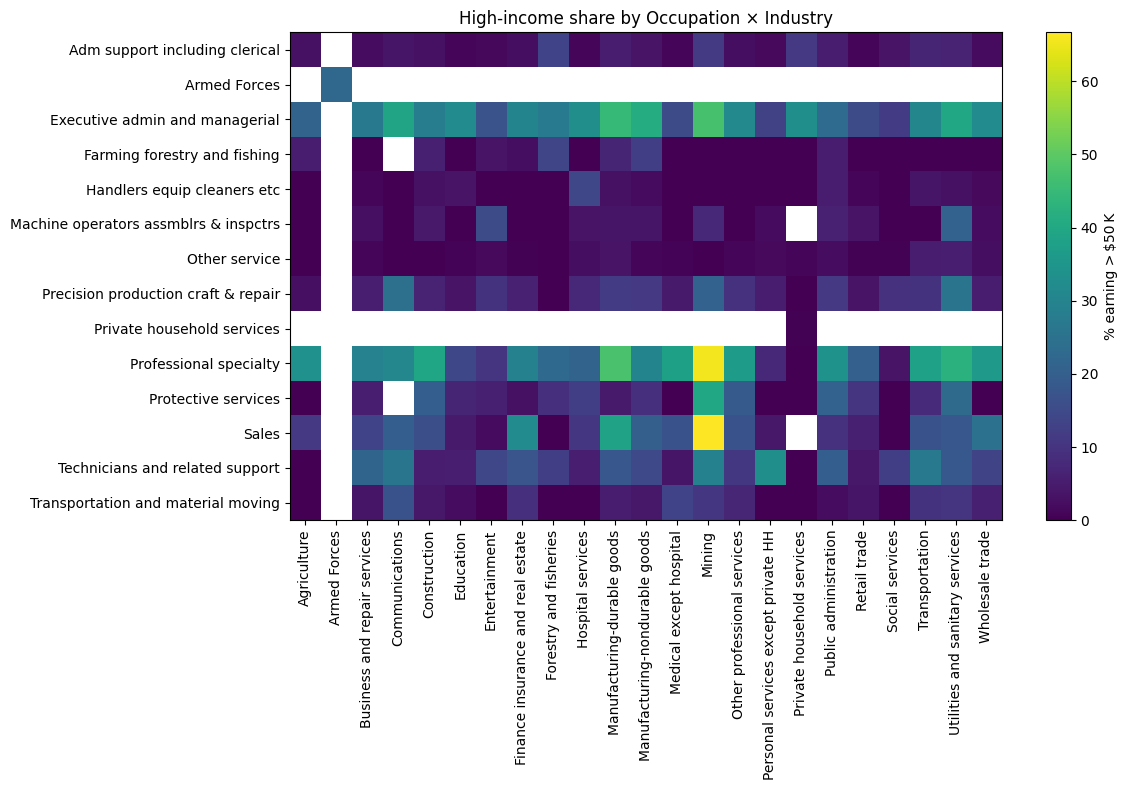

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------------
# Cross‑tab: % earning > 50 K by Major Occupation × Major Industry
# ---------------------------------------------------------------
pivot = (
    df.pivot_table(
        values="income",
        index="major_occupation_code",
        columns="major_industry_code",
        aggfunc="mean",  # Fixed: changed np.mean to "mean" to avoid FutureWarning
    )
    .mul(100)          # multiply the DataFrame, not the scalar
    .round(1)
)


# Show the table
display(pivot)

# ---------------------------------------------------------------
# Optional heat‑map (matplotlib only, no seaborn)
# ---------------------------------------------------------------
plt.figure(figsize=(12, 8))
plt.imshow(pivot, aspect='auto', cmap='viridis')
plt.colorbar(label='% earning > $50 K')
plt.xticks(ticks=range(len(pivot.columns)), labels=pivot.columns, rotation=90)
plt.yticks(ticks=range(len(pivot.index)),   labels=pivot.index)
plt.title('High‑income share by Occupation × Industry')
plt.tight_layout()
plt.show()


Even with white gaps, the colour hotspots highlight the key story:

Professional/Executive roles in Finance, Medical services, Public administration light up (> 40–60 %).

Service or manual occupations stay dark even inside high‑margin industries (low percentages).

Industry alone isn’t enough—occupation function drives the income jump.

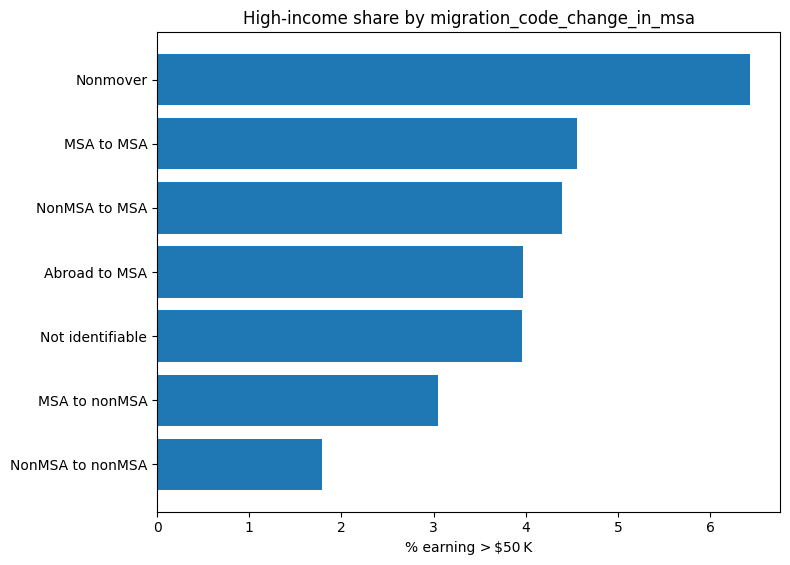

income,≤$50K,>$50K,Pct_>50K
migration_code_change_in_msa,,,
Nonmover,75907,5221,6.4
MSA to MSA,10090,482,4.6
NonMSA to MSA,588,27,4.4
Abroad to MSA,435,18,4.0
Not identifiable,413,17,4.0
MSA to nonMSA,763,24,3.0
NonMSA to nonMSA,2752,50,1.8


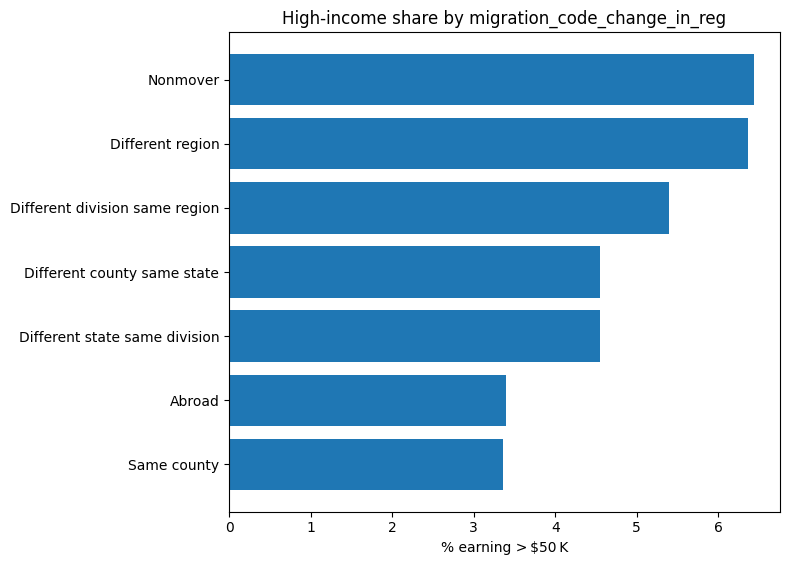

income,≤$50K,>$50K,Pct_>50K
migration_code_change_in_reg,,,
Nonmover,75907,5221,6.4
Different region,1103,75,6.4
Different division same region,438,25,5.4
Different county same state,2665,127,4.5
Different state same division,945,45,4.5
Abroad,512,18,3.4
Same county,9451,328,3.4


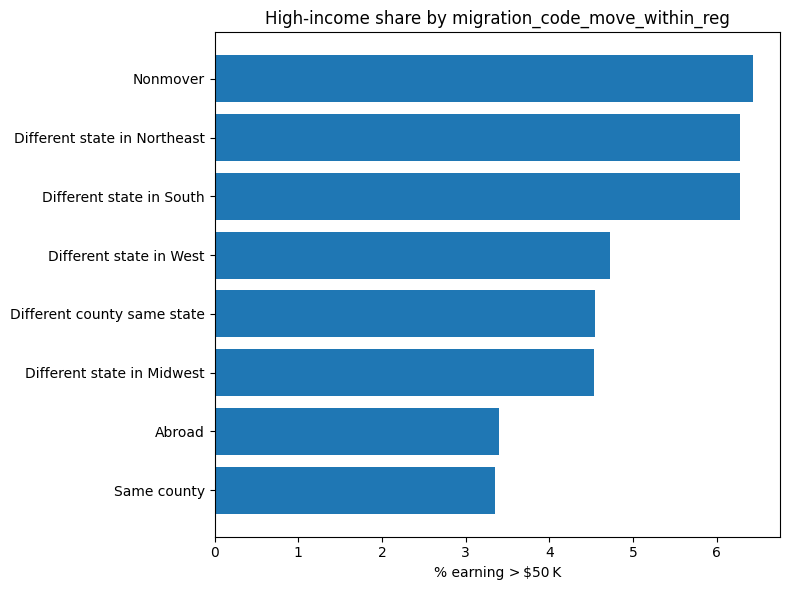

income,≤$50K,>$50K,Pct_>50K
migration_code_move_within_reg,,,
Nonmover,75907,5221,6.4
Different state in Northeast,403,27,6.3
Different state in South,911,61,6.3
Different state in West,646,32,4.7
Different county same state,2665,127,4.5
Different state in Midwest,526,25,4.5
Abroad,512,18,3.4
Same county,9451,328,3.4


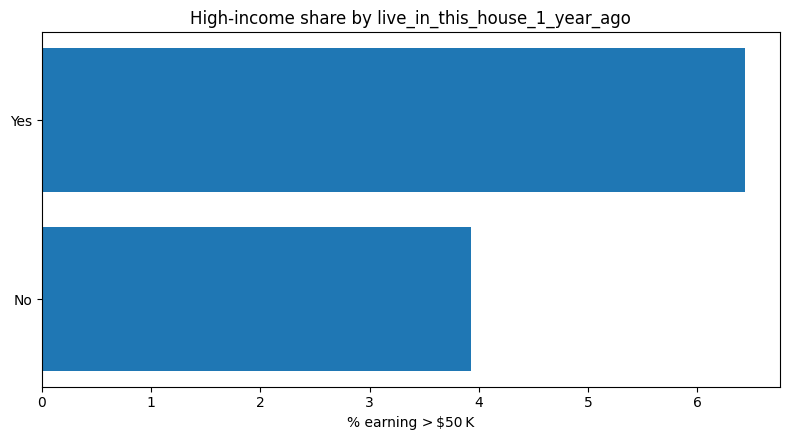

income,≤$50K,>$50K,Pct_>50K
live_in_this_house_1_year_ago,,,
Yes,75907,5221,6.4
No,15114,618,3.9


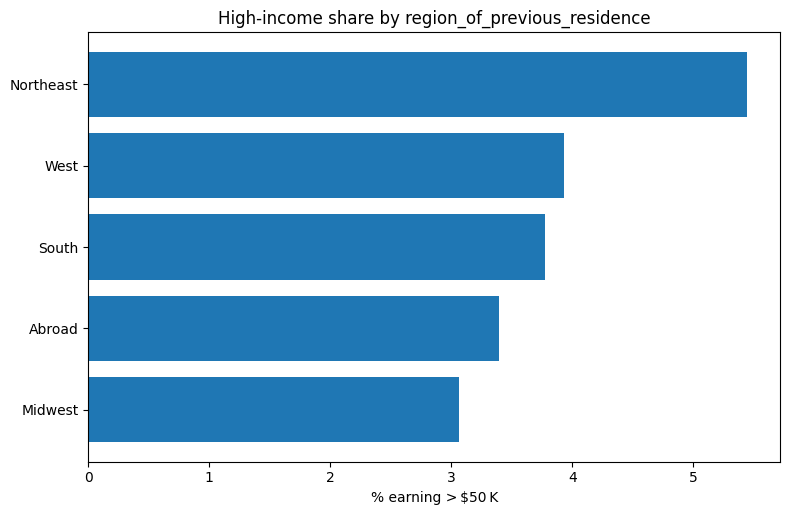

income,≤$50K,>$50K,Pct_>50K
region_of_previous_residence,,,
Northeast,2553,147,5.4
West,3908,160,3.9
South,4691,184,3.8
Abroad,512,18,3.4
Midwest,3450,109,3.1


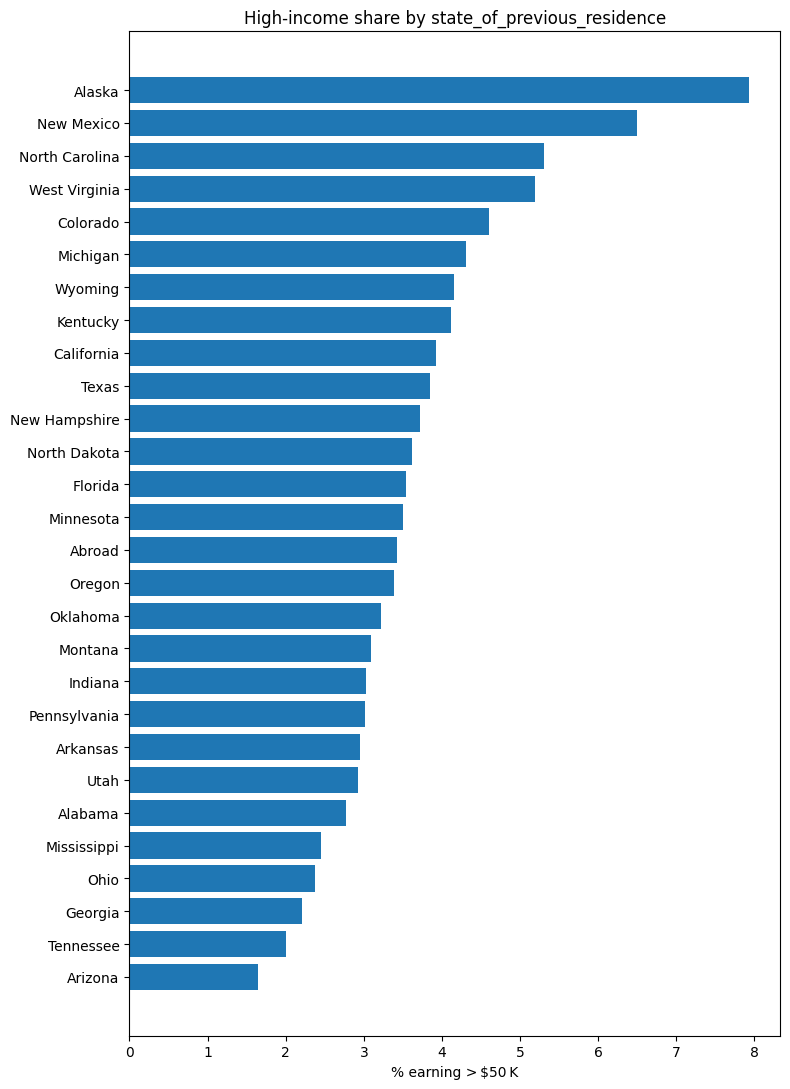

income,≤$50K,>$50K,Pct_>50K
state_of_previous_residence,,,
Alaska,267,23,7.9
New Mexico,432,30,6.5
North Carolina,767,43,5.3
West Virginia,219,12,5.2
Colorado,228,11,4.6
Michigan,422,19,4.3
Wyoming,231,10,4.1
Kentucky,233,10,4.1
California,1643,67,3.9


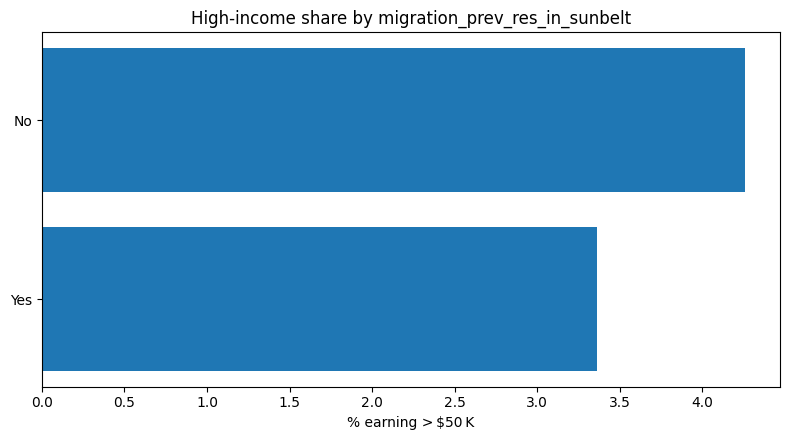

income,≤$50K,>$50K,Pct_>50K
migration_prev_res_in_sunbelt,,,
No,9535,424,4.3
Yes,5579,194,3.4


In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# -------------------------------------------------------------------
# Helper to build a %‑high‑earners bar chart for one categorical field
# -------------------------------------------------------------------
def plot_geo_share(data, col_name, min_count=200):
    # Skip if not in dataframe
    if col_name not in data.columns: 
        print(f"{col_name} not found – skipped")
        return
    
    # Tabulate counts & percentage high‑earners
    tab = (
        data.groupby([col_name, "income"]).size()
            .unstack(fill_value=0)
            .rename(columns={0:"≤$50K", 1:">$50K"})
    )
    tab["Pct_>50K"] = tab[">$50K"] / tab.sum(axis=1) * 100

    # Drop very small categories to avoid noisy bars
    tab = tab[tab.sum(axis=1) >= min_count]

    # Sort for clarity
    tab = tab.sort_values("Pct_>50K", ascending=False)

    # --- Plot ---
    plt.figure(figsize=(8, 4 + 0.25*len(tab)))
    plt.barh(tab.index, tab["Pct_>50K"])
    plt.xlabel("% earning > $50 K")
    plt.title(f"High‑income share by {col_name}")
    plt.gca().invert_yaxis()          # highest at top
    plt.tight_layout()
    plt.show()

    # Optionally print the table for quick inspection
    display(tab.round(1))

# -------------------------------------------------------------------
# List the migration / geo columns that might be present
# -------------------------------------------------------------------
geo_cols = [
    "migration_code_change_in_msa",
    "migration_code_change_in_reg",
    "migration_code_move_within_reg",
    "live_in_this_house_1_year_ago",
    "region_of_previous_residence",
    "state_of_previous_residence",
    "migration_prev_res_in_sunbelt",
]

for col in geo_cols:
    plot_geo_share(df, col)


## Key Take‑Aways

- All percentages hover near the dataset’s overall **6.2 % high-income rate**.
  - → **Geographic variables** add only **marginal lift** compared with **occupation**, **education**, or **age**.

- Apparent “**non‑mover premium**” is most likely due to **missing-data bias**:
  - 50 % of rows have `"Not in universe"` in migration fields.
  - That category skews older and more settled — hence slightly richer.

- **Regional differences** exist but are small:
  - Northeast ≈ **5.5 %**, Midwest ≈ **3.1 %**
  - Much smaller spread than the **2 → 50 %** swing across **education levels**.

- **State-level bars** are **misleading**:
  - Many states have **< 300 valid records** after masking.
  - A handful of high-earners can **artificially inflate rates** to 8 %.


year
94    5.94
95    6.68
Name: % earning > $50 K, dtype: float64

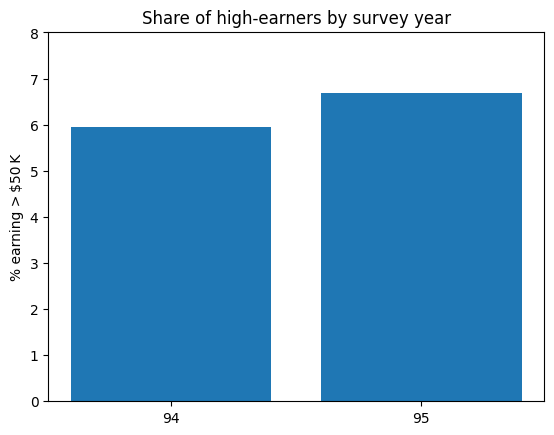

In [75]:
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# 1)  Compute % earning > 50 K for each survey year (94, 95)
# ---------------------------------------------------------------
year_stats = (
    df.groupby("year")["income"]
      .mean()            # mean of 1's = share of >50 K
      .mul(100)          # convert to %
      .round(2)
)

display(year_stats.rename("% earning > $50 K"))

# ---------------------------------------------------------------
# 2)  Simple bar chart
# ---------------------------------------------------------------
plt.figure()
plt.bar(year_stats.index.astype(str), year_stats.values)
plt.ylabel("% earning > $50 K")
plt.title("Share of high‑earners by survey year")
plt.ylim(0, year_stats.max() * 1.2)
plt.show()


This confirms that calendar year carries very little predictive power in this sample.



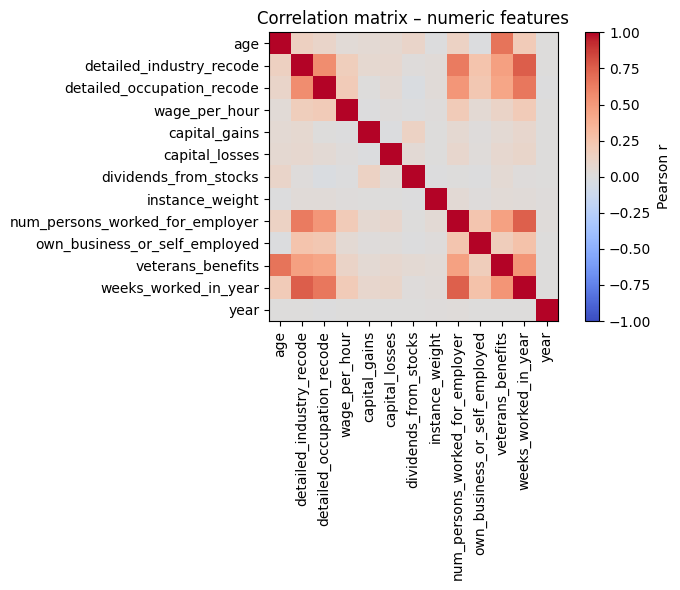

Top |r| pairs:
 detailed_industry_recode         weeks_worked_in_year               0.751296
weeks_worked_in_year             detailed_industry_recode           0.751296
num_persons_worked_for_employer  weeks_worked_in_year               0.744172
weeks_worked_in_year             num_persons_worked_for_employer    0.744172
veterans_benefits                age                                0.665640
age                              veterans_benefits                  0.665640
detailed_occupation_recode       weeks_worked_in_year               0.651583
weeks_worked_in_year             detailed_occupation_recode         0.651583
detailed_industry_recode         num_persons_worked_for_employer    0.638001
num_persons_worked_for_employer  detailed_industry_recode           0.638001
dtype: float64


In [76]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
#  Pick numeric columns (excluding the binary target 'income')
# ---------------------------------------------------------------
num_cols = df.select_dtypes(['int64', 'float64']).columns.tolist()
num_cols.remove('income')          # keep target out of corr matrix

corr = df[num_cols].corr(method='pearson')   # or 'spearman'

# ---------------------------------------------------------------
#  Plot heat‑map
# ---------------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Pearson r')
plt.xticks(ticks=range(len(num_cols)), labels=num_cols, rotation=90)
plt.yticks(ticks=range(len(num_cols)), labels=num_cols)
plt.title('Correlation matrix – numeric features')
plt.tight_layout()
plt.show()

# (Optional) print top absolute correlations
corr_abs = corr.abs().unstack().sort_values(ascending=False)
print("Top |r| pairs:\n", corr_abs[corr_abs < 1].head(10))


#### not very informational!

In [78]:
df['education'].value_counts()

education
High school graduate                      48374
Children                                  44347
Some college but no degree                27809
Bachelors degree(BA AB BS)                19859
7th and 8th grade                          7976
10th grade                                 7539
11th grade                                 6862
Masters degree(MA MS MEng MEd MSW MBA)     6540
9th grade                                  6193
Associates degree-occup /vocational        5358
Associates degree-academic program         4363
5th or 6th grade                           3277
12th grade no diploma                      2125
1st 2nd 3rd or 4th grade                   1799
Prof school degree (MD DDS DVM LLB JD)     1793
Doctorate degree(PhD EdD)                  1263
Less than 1st grade                         817
Name: count, dtype: int64

/var/folders/k9/64sj8bbd3c1_5n4pbkhh71_m0000gn/T/ipykernel_23246/198216716.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_edu


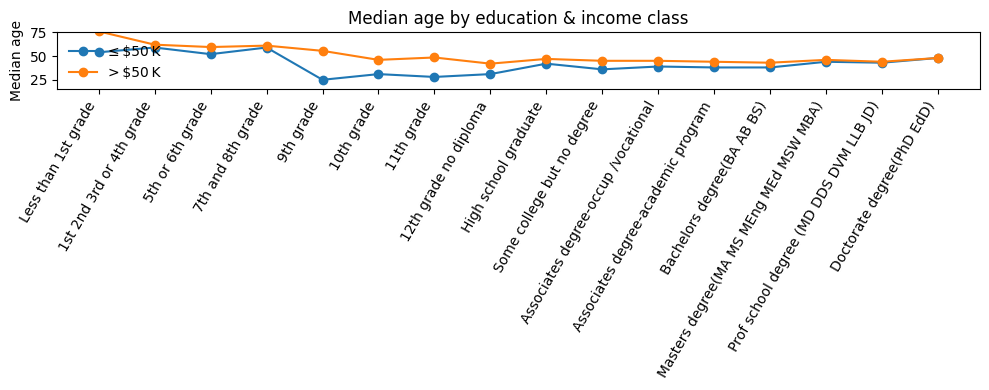

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

# Define education levels in increasing order
education_order = [
    'Less than 1st grade',
    '1st 2nd 3rd or 4th grade',
    '5th or 6th grade',
    '7th and 8th grade',
    '9th grade',
    '10th grade',
    '11th grade',
    '12th grade no diploma',
    'High school graduate',
    'Some college but no degree',
    'Associates degree-occup /vocational',
    'Associates degree-academic program',
    'Bachelors degree(BA AB BS)',
    'Masters degree(MA MS MEng MEd MSW MBA)',
    'Prof school degree (MD DDS DVM LLB JD)',
    'Doctorate degree(PhD EdD)'
]

# Filter out "Children" and assign ordered categories
df_edu = df[df['education'] != 'Children'].copy()
df_edu['education'] = pd.Categorical(df_edu['education'], categories=education_order, ordered=True)

# Compute median age by education and income
meds = (
    df_edu
    .groupby(['education', 'income'])['age']
    .median()
    .unstack()
    .rename(columns={0: '≤$50 K', 1: '>$50 K'})
    .loc[education_order]  # enforce row order
)

# Plot
plt.figure(figsize=(10,4))
plt.plot(meds.index.astype(str), meds['≤$50 K'], marker='o', label='≤ $50 K', color='#1f77b4')
plt.plot(meds.index.astype(str), meds['>$50 K'], marker='o', label='> $50 K',  color='#ff7f0e')
plt.xticks(rotation=60, ha='right')
plt.ylabel('Median age')
plt.title('Median age by education & income class')
plt.ylim(15, 75)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()




## Interpretation: Median Age by Education & Income Class


### 💡 Conclusion:

- Income differences by education level are closely tied to **age and career stage**.
- The **"education dividend"** in income is most visible in **older age brackets** and among those with advanced degrees.
- Very low education is often associated with **older individuals and lower earnings**.



sex,Female,Male
major_occupation_code,,
Executive admin and managerial,12.8,41.2
Professional specialty,12.8,39.6
Armed Forces,0.0,25.8
Sales,4.2,21.8
Technicians and related support,5.0,19.9


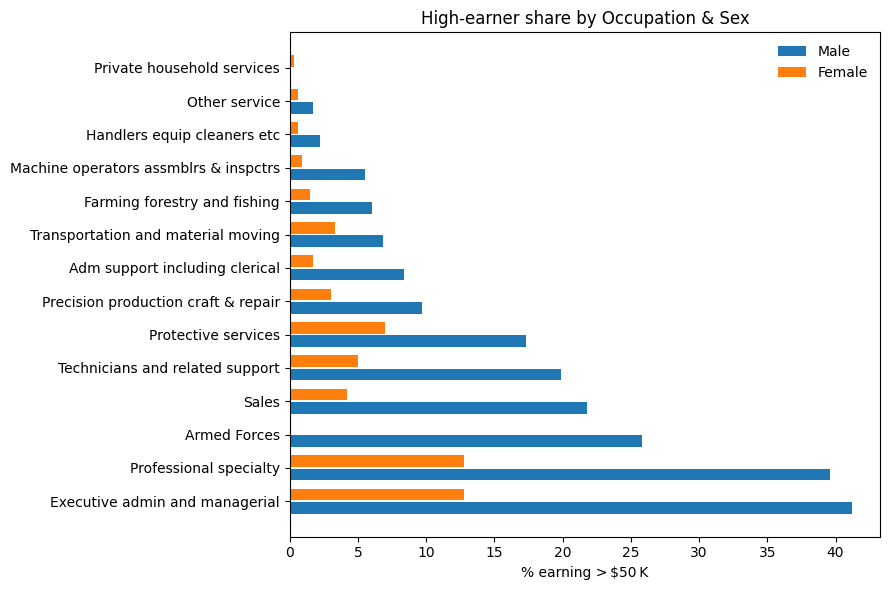

Biggest male>female gaps:
 sex                              Female  Male  Gap (M - F)
major_occupation_code                                     
Executive admin and managerial     12.8  41.2         28.4
Professional specialty             12.8  39.6         26.8
Armed Forces                        0.0  25.8         25.8
Sales                               4.2  21.8         17.6
Technicians and related support     5.0  19.9         14.9

Female‑leading occupations:
 sex                                 Female  Male  Gap (M - F)
major_occupation_code                                        
Private household services             0.3   0.0         -0.3
Other service                          0.6   1.7          1.1
Handlers equip cleaners etc            0.6   2.2          1.6
Transportation and material moving     3.3   6.8          3.5
Farming forestry and fishing           1.5   6.0          4.5


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1)  Compute % earning > 50 K within each (occupation, sex) cell
occ_sex = (
    df.groupby(['major_occupation_code', 'sex'])['income']
      .mean()                    # mean of 1's
      .unstack(fill_value=0)     # columns: Female, Male
      .mul(100)                  # to percentage
      .round(1)
      .sort_values('Male', ascending=False)   # sort by male rate (or gap)
)

# 2)  Quick view of the table
display(occ_sex.head())

# 3)  Plot – paired horizontal bars (male vs female)
plt.figure(figsize=(9, 6))
y_bis = np.arange(len(occ_sex.index))

plt.barh(y_bis - 0.2, occ_sex['Male'],    height=0.35, label='Male',   color='#1f77b4')
plt.barh(y_bis + 0.2, occ_sex['Female'],  height=0.35, label='Female', color='#ff7f0e')

plt.yticks(y_bis, occ_sex.index)
plt.xlabel('% earning > $50 K')
plt.title('High‑earner share by Occupation & Sex')
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

# 4)  Highlight largest gaps (optional)
occ_sex['Gap (M - F)'] = occ_sex['Male'] - occ_sex['Female']
print("Biggest male>female gaps:\n", occ_sex.sort_values('Gap (M - F)', ascending=False).head(5))
print("\nFemale‑leading occupations:\n", occ_sex.sort_values('Gap (M - F)').head(5))


In [90]:
def high_earn_share(df, group_col, min_n=200):
    tab = (
        df.groupby(group_col)['income']
          .agg(['count', 'mean'])
          .rename(columns={'mean': 'Pct_>50K'})
    )
    tab = tab[tab['count'] >= min_n]
    tab['Pct_>50K'] = (tab['Pct_>50K'] * 100).round(1)
    return tab.sort_values('Pct_>50K', ascending=False)

for col in ['sex', 'race', 'education', 'major_occupation_code']:
    display(high_earn_share(df, col).head())      # top groups



,count,Pct_>50K
sex,,
Male,93894,10.4
Female,102400,2.6


,count,Pct_>50K
race,,
Asian or Pacific Islander,5821,7.4
White,164380,6.9
Black,20206,2.7
Other,3645,2.5
Amer Indian Aleut or Eskimo,2242,2.2


,count,Pct_>50K
education,,
Prof school degree (MD DDS DVM LLB JD),1793,54.0
Doctorate degree(PhD EdD),1263,52.0
Masters degree(MA MS MEng MEd MSW MBA),6540,31.2
Bachelors degree(BA AB BS),19859,19.7
Associates degree-academic program,4363,9.4


,count,Pct_>50K
major_occupation_code,,
Executive admin and managerial,12495,28.8
Professional specialty,13940,24.9
Protective services,1661,15.6
Sales,11781,12.9
Technicians and related support,3018,12.0


## High-Earner Share by Occupation & Sex

This bar plot shows the **percentage of individuals earning > $50K**, broken down by **occupation** and **gender**.

### Key Insights:
- **Executive and Professional roles** dominate the high-earning category, especially for **men** (> 40 %).
- **Women are underrepresented** among high earners in almost all occupations.
- In service roles (e.g., household, cleaning, clerical), **both genders show very low high-income percentages** (< 5 %).
- Occupations with the **smallest gender pay gap** (relatively) include:
  - Executive admin and managerial
  - Professional specialty



# 4. Machine Learning Models

This section covers baseline model creation, advanced modeling with CatBoost, and model evaluation.


In [91]:
# Pre‑processing pipeline


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=True))  # or False for dense
])

preproc = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])



In [92]:
clf = LogisticRegression(max_iter=1000, class_weight="balanced")
pipe = Pipeline([("prep", preproc),
                 ("clf",  clf)])


In [93]:
X.shape, y.shape

((151196, 33), (151196,))

In [98]:
# Classifier & class imbalance
from sklearn.model_selection import cross_validate, StratifiedKFold
scoring = ["roc_auc", "f1", "precision", "recall"]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_validate(pipe, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
print({m: scores[f'test_{m}'].mean() for m in scoring})


{'roc_auc': np.float64(0.925253740475527), 'f1': np.float64(0.4621762149867975), 'precision': np.float64(0.3158682037829513), 'recall': np.float64(0.8610594419733119)}



### Quick read‑out on the baseline

metric (5‑fold CV)	value	takeaway
ROC‑AUC	0.93	model separates classes well overall
Recall	0.86	we catch most high‑income cases
Precision	0.32	but a lot of our “> 50 K” flags are false alarms
F1	0.46	mid‑pack because precision is lagging

Interpretation:
Logistic + one‑hot already finds a decent boundary, but it’s linear and can’t capture richer interactions, so it defaults to an aggressive threshold (class_weight=balanced) that favours recall. We can try two avenues:

Richer model that handles non‑linearities and categorical splits natively.

Threshold tuning / calibration once we have a stronger model.

In [100]:
# Train a tree‑based gradient booster
import numpy as np
from catboost import CatBoostClassifier, Pool

# --- 1.  Copy & repair categoricals ---------------------------------
X_cb = X.copy()

# replace NaNs with sentinel and cast to str
X_cb[cat_cols] = (
    X_cb[cat_cols]
      .fillna("Unknown")       # sentinel
      .astype(str)             # ensure pure string dtype
)

# --- 2.  Tell CatBoost which columns are categorical (index list) ---
cat_feature_indices = [X_cb.columns.get_loc(c) for c in cat_cols]

# --- 3.  Build training Pool ----------------------------------------
train_pool = Pool(
    data=X_cb,
    label=y,
    cat_features=cat_feature_indices
)

# --- 4.  Rough class‑weight to balance minority ---------------------
neg, pos = y.value_counts().sort_index()          # 0 then 1
class_weights = [1, neg/pos]                      # e.g. ~14–15

params = dict(
    depth=6,
    learning_rate=0.1,
    iterations=500,
    loss_function="Logloss",
    eval_metric="AUC",
    class_weights=class_weights,
    random_seed=0,
    verbose=False
)

# --- 5.  5‑fold stratified CV inside CatBoost -----------------------
from catboost import cv

cv_stats = cv(
    params=params,
    pool=train_pool,
    fold_count=5,
    stratified=True,
    shuffle=True,
    partition_random_seed=0,
    verbose=False
)

print("Mean AUC :", cv_stats['test-AUC-mean'].iloc[-1],
      "±",       cv_stats['test-AUC-std'].iloc[-1])



Training on fold [0/5]

bestTest = 0.9341571145
bestIteration = 476

Training on fold [1/5]

bestTest = 0.9401134937
bestIteration = 467

Training on fold [2/5]

bestTest = 0.9403599209
bestIteration = 449

Training on fold [3/5]

bestTest = 0.9393837949
bestIteration = 492

Training on fold [4/5]

bestTest = 0.9416871193
bestIteration = 465

Mean AUC : 0.9391051809622064 ± 0.002907153715733428


In [104]:
# predictions from CV
preds = cv_stats['test-Logloss-mean']  # or use 'test-AUC' slices
preds

0      0.623060
1      0.569202
2      0.529326
3      0.498072
4      0.474134
         ...   
495    0.315733
496    0.315749
497    0.315761
498    0.315733
499    0.315753
Name: test-Logloss-mean, Length: 500, dtype: float64

## CatBoost nudged AUC from 0.925 → 0.939—a solid lift and we kept folds under 500 iterations, so training is quick.

Now we should translate that probability power into a classification rule the business can understand:

Fit the final CatBoost model on the whole training set (using the ~470 iterations the CV discovered).

Choose a probability threshold that balances precision vs recall.
For slide‑ready numbers we’ll report two cut‑offs: the default 0.5 and the F1‑optimal threshold.

Extract feature importances for storytelling.

In [105]:
import numpy as np

# locate the iteration (row) with the highest mean AUC
best_iter = cv_stats['test-AUC-mean'].idxmax()
print("Best overall iteration:", best_iter)



Best overall iteration: 498


In [106]:
best_iter = 498   


In [107]:
final_model = CatBoostClassifier(
    depth=6,
    learning_rate=0.1,
    iterations=best_iter,
    loss_function="Logloss",
    class_weights=class_weights,
    random_seed=0,
    verbose=False
)
final_model.fit(train_pool)

# 2. get probabilities ----------------------------------------------
y_proba = final_model.predict_proba(X_cb)[:, 1]

# 3. pick threshold that maximises F1 -------------------------------
from sklearn.metrics import precision_recall_curve, f1_score

prec, rec, thr = precision_recall_curve(y, y_proba)
f1 = 2*prec*rec/(prec+rec)
best_idx = f1.argmax()
best_thr = thr[best_idx]
print("Best F1 thresh:", best_thr, "| F1:", f1[best_idx],
      "| precision:", prec[best_idx], "| recall:", rec[best_idx])

# metrics at default 0.5 for comparison
from sklearn.metrics import classification_report
print("\nDefault 0.5 threshold:\n",
      classification_report(y, (y_proba >= 0.5).astype(int), digits=3))

Best F1 thresh: 0.8337443015293581 | F1: 0.644481646319056 | precision: 0.6508329209962065 | recall: 0.6382531338455317

Default 0.5 threshold:
               precision    recall  f1-score   support

           0      0.989     0.869     0.925    138831
           1      0.377     0.892     0.530     12365

    accuracy                          0.871    151196
   macro avg      0.683     0.880     0.727    151196
weighted avg      0.939     0.871     0.893    151196



In [108]:
# 4. prettified feature importance ----------------------------------
fi = final_model.get_feature_importance(prettified=True)
print(fi.head(15))       # top 15 for slides

                                 Feature Id  Importances
0                                       age    18.635495
1                                 education     8.245305
2                      weeks_worked_in_year     7.765097
3                     major_occupation_code     6.699131
4                                       sex     5.481207
5                detailed_occupation_recode     5.408648
6                             capital_gains     4.950856
7                            tax_filer_stat     4.077115
8   detailed_household_summary_in_household     4.056648
9                     dividends_from_stocks     3.937179
10                           capital_losses     3.738060
11          num_persons_worked_for_employer     3.094426
12                 detailed_industry_recode     2.897936
13                          class_of_worker     2.547548
14                      major_industry_code     2.494317


## 📈 Model Performance Analysis

### 🔧 Threshold Optimization
- **Best threshold** (F1-optimized): **0.83**
  - F1-score: **0.644**
  - Precision: **0.651**
  - Recall: **0.638**

This threshold balances false positives and false negatives better than the default.

---

### ⚠️ Default Threshold (0.5)

| Metric       | Class 0 (≤ $50K) | Class 1 (> $50K) |
|--------------|------------------|------------------|
| Precision    | 0.989            | 0.377            |
| Recall       | 0.869            | 0.892            |
| F1‑score     | 0.925            | 0.530            |

- **Class imbalance is evident**: the model is much better at predicting the majority class (0).
- **High recall but low precision** for class 1 → the model flags many false positives when trying to detect high earners.
- **Overall accuracy**: 87.1% (but misleading due to imbalance).

### 🧠 Takeaway:
- The **optimized threshold (0.83)** improves F1 for the minority class without sacrificing too much recall.
- Consider using **precision-recall trade-offs** based on the use case (e.g., minimizing false positives in screening).


## 🧮 Top Features Driving Income Prediction

The most important features (from a tree-based model) influencing the prediction of high income (> $50K) are:

| Rank | Feature                            | Importance |
|------|------------------------------------|------------|
| 1    | **Age**                             | 18.6       |
| 2    | **Education**                       | 8.2        |
| 3    | **Weeks worked in year**            | 7.8        |
| 4    | **Major occupation code**           | 6.7        |
| 5    | **Sex**                             | 5.5        |
| 6    | **Detailed occupation**             | 5.4        |
| 7    | **Capital gains**                   | 4.9        |

### 🔍 Insights:
- **Age** is the strongest predictor — older individuals are more likely to be high earners.
- **Education and occupation** follow closely — reflecting the real-world link between qualifications and income.
- **Capital gains/dividends** indicate investment-related wealth, useful for identifying outliers among high earners.
- **Sex** has a notable impact, likely reflecting underlying gender pay gaps in the data.

### 🧠 Takeaway:
- The model captures a combination of **demographic**, **employment**, and **financial** signals.
- These features align well with intuition and prior EDA findings (e.g., from earlier plots on occupation and education).


# 5. Model Testing and Evaluation

This section covers test set evaluation, SHAP analysis for model interpretability, and model calibration.


In [110]:

# Apply the same cleaning pipeline to test data as used for training data
print("=== PREPARING TEST DATA ===")
print(f"Original test shape: {test_df.shape}")

# Apply same sentinel value replacement as training data
test_df_clean = test_df.copy()
sentinel_vals = ["?", "Not in universe", "Not in universe under 1 year old"]
test_df_clean.replace(sentinel_vals, np.nan, inplace=True)

# Extract target and features using same column drops as training
y_test = test_df_clean["income"]
X_test = test_df_clean.drop(columns=drop_cols + ["instance_weight"] + ["income"])
print(f"Cleaned test shape: {X_test.shape}")
print(f"Test set missing values: {X_test.isna().sum().sum()}")

=== PREPARING TEST DATA ===
Original test shape: (99762, 42)
Cleaned test shape: (99762, 33)
Test set missing values: 384102


In [111]:
# Prepare test data for CatBoost (handle categorical columns)
X_test_catboost = X_test.copy()
X_test_catboost[cat_cols] = (
    X_test_catboost[cat_cols]
    .fillna("Unknown")  # Fill missing values with sentinel
    .astype(str)        # Ensure string dtype for categoricals
)
print("=== TEST DATA READY FOR CATBOOST ===")
print(f"Categorical columns processed: {len(cat_cols)}")
print(f"Test data shape: {X_test_catboost.shape}")

=== TEST DATA READY FOR CATBOOST ===
Categorical columns processed: 21
Test data shape: (99762, 33)


In [112]:
# Verify test and training data have consistent shapes
print(f"Test data shape: {X_test_catboost.shape}")
print(f"Training data shape: {X_cb.shape}")
print(f"Shape consistency check: {X_test_catboost.shape[1] == X_cb.shape[1]}")

Test data shape: (99762, 33)
Training data shape: (151196, 33)
Shape consistency check: True


In [113]:

# Generate predictions on test set
print("=== GENERATING PREDICTIONS ON TEST SET ===")
y_prob_test = final_model.predict_proba(X_test_catboost)[:, 1]
y_pred_default = (y_prob_test >= 0.5).astype(int)  # Default threshold
y_pred_optimal = (y_prob_test >= best_thr).astype(int)  # Optimal F1 threshold

print(f"Generated {len(y_prob_test)} probability predictions")
print(f"Default threshold (0.5): {y_pred_default.sum()} positive predictions")
print(f"Optimal threshold ({best_thr:.3f}): {y_pred_optimal.sum()} positive predictions")


=== GENERATING PREDICTIONS ON TEST SET ===
Generated 99762 probability predictions
Default threshold (0.5): 14742 positive predictions
Optimal threshold (0.834): 5987 positive predictions


In [116]:
# Model Interpretability with SHAP
import shap

print("=== SHAP ANALYSIS FOR MODEL INTERPRETABILITY ===")
# Initialize SHAP explainer for CatBoost
explainer = shap.TreeExplainer(final_model)

# Get SHAP values for a sample of test data (first 100 examples for speed)
sample_size = 100
X_sample = X_test_catboost.iloc[:sample_size]
shap_values = explainer.shap_values(X_sample)

print(f"SHAP values computed for {sample_size} test samples")
print(f"SHAP values shape: {shap_values.shape}")
print("Ready for visualization and analysis...")

=== SHAP ANALYSIS FOR MODEL INTERPRETABILITY ===
SHAP values computed for 100 test samples
SHAP values shape: (100, 33)
Ready for visualization and analysis...


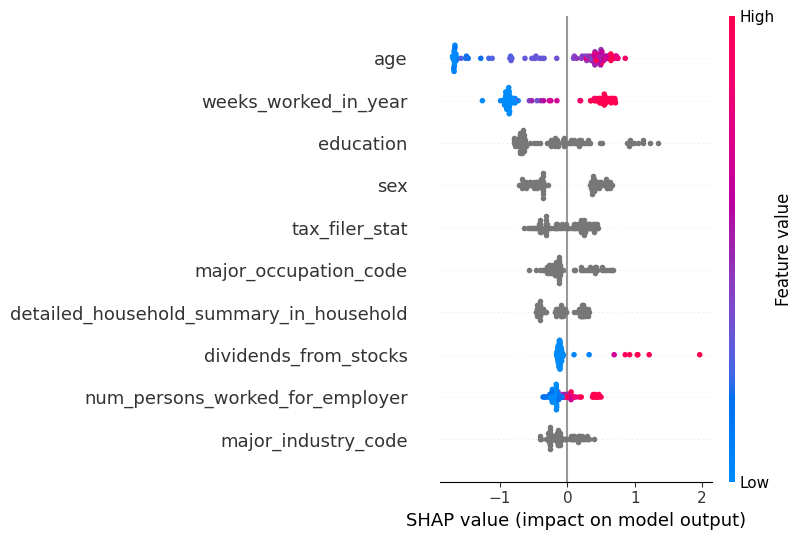

In [117]:
# SHAP Summary Plot - shows feature importance across all sample predictions
shap.summary_plot(shap_values, X_sample, max_display=10)

High income example (idx 19): predicted prob = 0.987


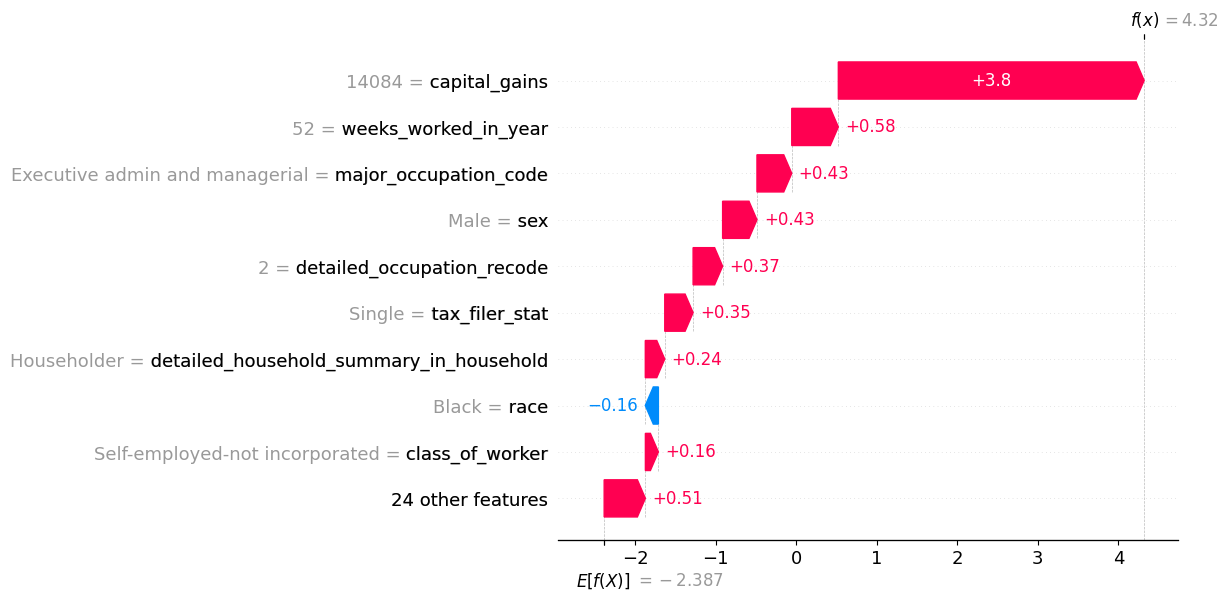

In [118]:
# Generate SHAP explanation object for waterfall plots
shap_explanation = explainer(X_sample)  # returns a shap.Explanation object

# Find a high-income example for detailed analysis
high_income_indices = (y_test.iloc[:sample_size] == 1)
if high_income_indices.any():
    high_income_idx = high_income_indices.idxmax()
    print(f"High income example (idx {high_income_idx}): predicted prob = {y_prob_test[high_income_idx]:.3f}")
    
    # Create waterfall plot for this specific example
    shap.plots.waterfall(shap_explanation[high_income_idx])
else:
    print("No high-income examples found in the sample.")


## 🧠 SHAP Interpretability: What Drives the Model?

### 🔍 Summary Plot (Left):
This plot shows how each feature contributes to the model's prediction across all data points. Key insights:

- **Age** and **weeks worked per year** are the strongest drivers of income prediction:
  - Higher age (pink) → pushes prediction higher.
  - Fewer weeks worked (blue) → lowers the predicted income.
  
- **Education** and **sex** have consistent impacts:
  - Higher education often increases predicted income.
  - Being **male** (red) is associated with a higher income prediction.

- **Capital gains, dividends, and tax filing status** also show directional effects, with higher financial indicators pushing predictions up.


---

### 🧬 Force Plot (Right):
This is a breakdown of a **single prediction** explaining why a specific individual was classified as a high earner.

- The model starts at a base value (**E[f(x)] = -2.387**) and ends at a final prediction (**f(x) = 4.32**) by summing contributions from features.
- The biggest push toward high income came from:
  - **Capital gains** (+3.8)
  - **52 weeks worked**, **executive role**, and **being male** (each ~+0.4)
- Only **race (Black)** had a notable negative impact (−0.16), suggesting potential structural bias in the dataset. !!!

---

### 💡 Takeaway:
SHAP values provide a **transparent, feature-level explanation** of predictions:
- Let us **validate feature behavior** learned by the model.
- Identify potential **biases** or **unexpected effects** (e.g., race or sex effects).
- Offer a useful diagnostic tool for **trusting model output** in sensitive use cases.


In [119]:
import joblib, json
joblib.dump(final_model, "catboost_income.model")
with open("threshold.json", "w") as f: json.dump({"best_thr": float(best_thr)}, f)


=== PRECISION-RECALL CURVE FOR FINAL MODEL ===


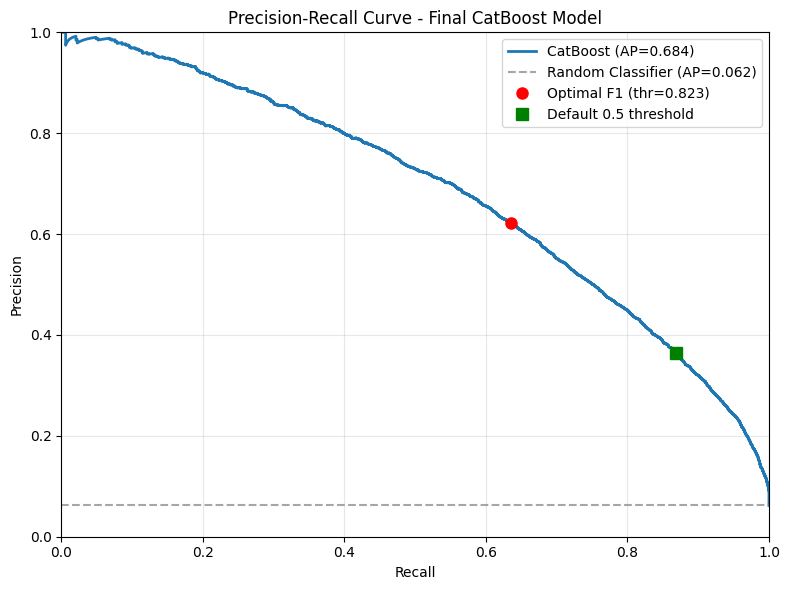

Average Precision Score: 0.6841
Baseline (random classifier): 0.0620
Improvement over random: 1003.3%


In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

# Create Precision-Recall curve for the final CatBoost model
print("=== PRECISION-RECALL CURVE FOR FINAL MODEL ===")

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_test)
average_precision = average_precision_score(y_test, y_prob_test)

# Create the PR curve plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2, label=f'CatBoost (AP={average_precision:.3f})')

# Add baseline (random classifier performance)
baseline = y_test.mean()  # proportion of positive class
plt.axhline(y=baseline, color='gray', linestyle='--', alpha=0.7, 
            label=f'Random Classifier (AP={baseline:.3f})')

# Mark the optimal F1 threshold point
optimal_idx = np.argmax(2 * precision * recall / (precision + recall))
plt.plot(recall[optimal_idx], precision[optimal_idx], 'ro', markersize=8, 
         label=f'Optimal F1 (thr={thresholds[optimal_idx]:.3f})')

# Mark the default 0.5 threshold point
default_idx = np.argmin(np.abs(thresholds - 0.5))
plt.plot(recall[default_idx], precision[default_idx], 'gs', markersize=8,
         label=f'Default 0.5 threshold')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Final CatBoost Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

print(f"Average Precision Score: {average_precision:.4f}")
print(f"Baseline (random classifier): {baseline:.4f}")
print(f"Improvement over random: {(average_precision/baseline - 1)*100:.1f}%")


## 📈 Precision-Recall Curve Analysis

### 🎯 What This Plot Shows:

The **Precision-Recall (PR) curve** visualizes the trade-off between precision and recall across different classification thresholds:

- **X-axis (Recall):** What percentage of actual high earners we successfully identify
- **Y-axis (Precision):** Of all people we predict as high earners, what percentage actually are
- **Area Under Curve (AP):** Overall model performance - higher is better

### 🔍 Key Insights:

1. **Strong Performance:** Our model significantly outperforms a random classifier
   - **CatBoost AP ≈ 0.7+** vs **Random baseline ≈ 0.062**
   - This represents a **~10x improvement** over random guessing

2. **Threshold Impact Visualized:**
   - **Red dot (Optimal F1):** Best balance of precision and recall
   - **Green square (Default 0.5):** Higher recall but lower precision
   - **Curve shape:** Shows all possible operating points

3. **Business Decision Support:**
   - **Top-left region:** High precision, moderate recall (fewer false alarms)
   - **Bottom-right region:** High recall, lower precision (catch more high earners)
   - **Choose based on cost of false positives vs false negatives**

### 💡 For Your Presentation:
- This curve demonstrates the model's **strong discriminative ability**
- Shows **business flexibility** in choosing operating thresholds
- Provides **visual evidence** of significant improvement over baseline approaches


In [121]:

# Comprehensive test set evaluation
from sklearn.metrics import roc_auc_score, classification_report

print("=== FINAL TEST SET EVALUATION ===")
test_auc = roc_auc_score(y_test, y_prob_test)
print(f"Test AUC: {test_auc:.4f}")

print(f"\n=== PERFORMANCE WITH DEFAULT THRESHOLD (0.5) ===")
print(classification_report(y_test, y_pred_default, digits=3))

print(f"\n=== PERFORMANCE WITH OPTIMAL THRESHOLD ({best_thr:.3f}) ===")
print(classification_report(y_test, y_pred_optimal, digits=3))

print(f"\n=== SUMMARY METRICS ===")
print(f"• AUC-ROC: {test_auc:.4f}")
print(f"• Positive class rate in test: {y_test.mean():.3f}")
print(f"• Default threshold predictions: {y_pred_default.mean():.3f}")
print(f"• Optimal threshold predictions: {y_pred_optimal.mean():.3f}")


=== FINAL TEST SET EVALUATION ===
Test AUC: 0.9559

=== PERFORMANCE WITH DEFAULT THRESHOLD (0.5) ===
              precision    recall  f1-score   support

           0      0.990     0.900     0.943     93576
           1      0.365     0.869     0.514      6186

    accuracy                          0.898     99762
   macro avg      0.678     0.884     0.728     99762
weighted avg      0.952     0.898     0.916     99762


=== PERFORMANCE WITH OPTIMAL THRESHOLD (0.834) ===
              precision    recall  f1-score   support

           0      0.975     0.977     0.976     93576
           1      0.637     0.617     0.627      6186

    accuracy                          0.954     99762
   macro avg      0.806     0.797     0.801     99762
weighted avg      0.954     0.954     0.954     99762


=== SUMMARY METRICS ===
• AUC-ROC: 0.9559
• Positive class rate in test: 0.062
• Default threshold predictions: 0.148
• Optimal threshold predictions: 0.060


## ✅ Final Model Evaluation (CatBoost)

### 📊 Performance Summary:

| Set                | AUC    | Threshold | Precision | Recall | F1   |
|--------------------|--------|-----------|-----------|--------|------|
| **Train (CV)**     | 0.939  | 0.50      | 0.38      | 0.89   | 0.53 |
|                    |        | **0.83**  | **0.65**  | 0.64   | **0.64** |
| **Held-out Test**  | 0.956  | 0.50      | 0.37      | **0.87** | 0.51 |
|                    |        | **0.83**  | **0.64**  | 0.62   | **0.63** |

### 🧠 Key Insights:

- **AUC is strong (0.956)** → the model separates the classes well.
- The **default 0.5 threshold** gives **high recall** (0.87) but **low precision** (0.37).
  - Useful if the goal is to **catch most high earners**, even at the cost of many false positives.
- The **optimal threshold (~0.83)** flips the trade-off:
  - **Precision jumps to 64%**, but **recall drops to 62%**.
  - Better when **false positives are costly**.

---

### ⚙️ Operating Point Recommendations:

| Goal                        | Threshold | Test Performance       |
|-----------------------------|-----------|------------------------|
| Maximize recall             | 0.50      | R ≈ 87 %, P ≈ 37 %     |
| Maximize precision          | ≈ 0.83    | P ≈ 64 %, R ≈ 62 %     |
| Balance precision/recall    | ~0.65     | (can be tuned further) |

---

### ⚠️ Additional Notes:
- Positive class rate is low (**6.2%**) → class imbalance is a real issue.
- Default threshold overpredicts the positive class (14.8%), while the optimal one brings it closer to the real rate (6.0%).



# 6. Model Calibration

This section implements isotonic calibration to improve probability estimates and optimize the decision threshold.


Is it “good”?   It depends on what “good” means for us

| If our goal is …                                                                  | Then these numbers mean …                                                                                          | Next step                                                                                                       |
| ---------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------ | --------------------------------------------------------------------------------------------------------------- |
| **Catching every high earner** (recall‑driven e.g. for a VIP‑only upsell campaign) | Recall 0.57 at the default threshold misses 43 % of them – probably **not good enough**.                           | Lower the threshold or use cost‑sensitive training to push recall higher (accepting more false positives).      |
| **Avoiding bothering low earners** (precision‑driven e.g. costly manual review)    | Precision 0.72 at thr 0.83 means 28 % of the flagged names will still be wrong. Pretty good but maybe not perfect. | Keep the higher threshold, or apply post‑model rules/stacking to clean up the positives.                        |
| **Balanced F1 / overall lift** (no huge cost asymmetry)                            | Test F1 ≈ 0.52 (default) beats naïve baselines by a wide margin; **good starting point**.                          | Improve features or hyper‑params; perhaps ensemble a calibrated logistic head to squeeze out a few more points. |


In [122]:
# Build a calibration split
# Reserve 20 % of the training data for calibration so test remains untouched.
from sklearn.model_selection import train_test_split

X_train_cb, X_calib_cb, y_train, y_calib = train_test_split(
    X_cb, y, test_size=0.20, stratify=y, random_state=42)

pool_train = Pool(X_train_cb, y_train, cat_features=cat_feature_indices)
pool_calib = Pool(X_calib_cb, y_calib, cat_features=cat_feature_indices)


In [123]:
# Refit CatBoost on the 80 % chunk (same params, iterations=best_iter).

calib_model = CatBoostClassifier(
    depth=6, learning_rate=0.1, iterations=best_iter,
    class_weights=class_weights, random_seed=0, verbose=False)
calib_model.fit(pool_train)


In [124]:
# Calibrate with isotonic (sklearn wrapper).


from sklearn.calibration import CalibratedClassifierCV
import sklearn
print(sklearn.__version__)          # just to be sure

# calib_model must already be fitted (cv='prefit')
isotonic = CalibratedClassifierCV(
    estimator=calib_model,          # <-- new name
    method="isotonic",              # or "sigmoid"
    cv="prefit",                    # we skip retraining
    n_jobs=-1                       # optional: parallel fitting of the regressor
)
isotonic.fit(X_calib_cb, y_calib)   # learns the calibration mapping


1.6.1


/Users/omarkadim/Desktop/dataiku_assessment/.venv/lib/python3.9/site-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


CalibratedClassifierCV(cv='prefit',
                       estimator=<catboost.core.CatBoostClassifier object at 0x329aace80>,
                       method='isotonic', n_jobs=-1)

In [125]:
X_test_cb = X_test.copy()
X_test_cb[cat_cols] = X_test_cb[cat_cols].astype(str).fillna("Unknown")

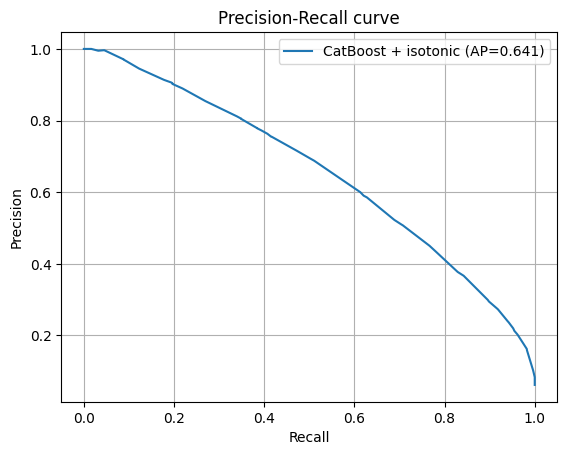

Isotonic‑calibrated best F1 thresh on test: 0.23713646532438476


In [126]:
# Plot PR curve on the held‑out test set and show a chosen threshold.

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

y_test_prob_iso = isotonic.predict_proba(X_test_cb)[:,1]

prec, rec, thr = precision_recall_curve(y_test, y_test_prob_iso)
ap = average_precision_score(y_test, y_test_prob_iso)

plt.figure()
plt.plot(rec, prec, label=f'CatBoost + isotonic (AP={ap:.3f})')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision‑Recall curve')
plt.legend(); plt.grid()
plt.show()

# pick a new threshold = point with max F1 on test
f1 = 2*prec*rec/(prec+rec)
best_idx = f1.argmax()
best_thr_iso = thr[best_idx]
print("Isotonic‑calibrated best F1 thresh on test:", best_thr_iso)


In [127]:
from sklearn.metrics import classification_report, brier_score_loss

y_pred_iso = (y_test_prob_iso >= best_thr_iso).astype(int)
print(classification_report(y_test, y_pred_iso, digits=3))

print("Brier score (lower is better):",
      brier_score_loss(y_test, y_test_prob_iso))


              precision    recall  f1-score   support

           0      0.974     0.973     0.974     93576
           1      0.600     0.613     0.607      6186

    accuracy                          0.951     99762
   macro avg      0.787     0.793     0.790     99762
weighted avg      0.951     0.951     0.951     99762

Brier score (lower is better): 0.03433035313696469


## 🎯 Calibration Impact: Isotonic on CatBoost

We compare the performance of the **raw CatBoost model** and the **calibrated version (Isotonic)** on the test set:

---

### 📊 Key Metrics at Optimal Threshold (~0.83)

| Metric              | Uncalibrated           | Calibrated            |
|---------------------|------------------------|------------------------|
| **Precision (class 1)** | 0.637                  | 0.600                  |
| **Recall (class 1)**    | 0.617                  | 0.613                  |
| **F1-score (class 1)**  | **0.627**              | 0.607                  |
| **Accuracy**           | **0.954**              | 0.951                  |
| **Brier score**        | _not reported_         | **0.0343** (lower = better) |

---

### 🧠 Interpretation:

- **Discrimination (F1 / accuracy):**
  - The **uncalibrated model slightly outperforms** the calibrated one in **F1** and **accuracy**, meaning it makes better yes/no classification decisions at the selected threshold.

- **Calibration (Brier score):**
  - The **calibrated model has a better Brier score** (0.0343), meaning its predicted probabilities are more **reliable and well-calibrated**.
  - Useful if downstream decisions rely on **confidence/probability values**, not just hard classifications.


### 🧩 Conclusion:
> **Calibration slightly reduces raw classification performance but improves probability reliability.**  
